# Library Setup

In [1]:
# Install packages
required_packages <- c("censReg", "cenGAM", "AER", "dplyr", "ggplot2",
                       "caret", "Metrics", "tidyr", "gridExtra")

installed_packages <- rownames(installed.packages())

for(p in required_packages){
  if(!(p %in% installed_packages)){
    install.packages(p, dependencies = TRUE)
  }
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘rbibutils’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘zoo’, ‘bdsmatrix’, ‘collapse’, ‘Rdpack’, ‘Formula’, ‘car’, ‘maxLik’, ‘glmmML’, ‘sandwich’, ‘miscTools’, ‘plm’, ‘AER’, ‘lmtest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘mitools’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘gtools’, ‘caTools’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘TTR’, ‘survey’, ‘estimability’, ‘insight’, ‘fBasics’, ‘timeDate’, ‘timeSeries’, ‘fastICA’, ‘cvar’, ‘fracdiff’, ‘RcppArmadillo’, ‘dfidx’, ‘statmod’, ‘cubature’, ‘quadprog’, ‘gplots’, ‘Rsoln

In [2]:
# Load libraries
library(censReg)
library(cenGAM)
library(AER)
library(dplyr)
library(ggplot2)
library(caret)
library(Metrics)
library(tidyr)
library(gridExtra)

Loading required package: maxLik

Loading required package: miscTools


Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/


Please cite the 'censReg' package as:
Henningsen, Arne (2017). censReg: Censored Regression (Tobit) Models. R package version 0.5. http://CRAN.R-Project.org/package=censReg.

If you have questions, suggestions, or comments regarding the 'censReg' package, please use a forum or 'tracker' at the R-Forge site of the 'sampleSelection' project:
https://r-forge.r-project.org/projects/sampleselection/

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Loadin

# Load Data

In [3]:
# Load the 'Affairs' dataset
data("Affairs", package = "AER")
df <- Affairs

# View the first few rows
head(df)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>
4,0,male,37,10.00,no,3,18,7,4
5,0,female,27,4.00,no,4,14,6,4
11,0,female,32,15.00,yes,1,12,1,4
16,0,male,57,15.00,yes,5,18,6,5
23,0,male,22,0.75,no,2,17,6,3
29,0,female,32,1.50,no,2,17,5,5


# Explore Data

In [4]:
# Summary statistics
summary(df)

# Check for missing values
cat("\n")
cat("Total Missing Values in Dataset:", sum(is.na(df)))
cat("\n\n")

# Structure of the dataset
str(df)

    affairs          gender         age         yearsmarried    children 
 Min.   : 0.000   female:315   Min.   :17.50   Min.   : 0.125   no :171  
 1st Qu.: 0.000   male  :286   1st Qu.:27.00   1st Qu.: 4.000   yes:430  
 Median : 0.000                Median :32.00   Median : 7.000            
 Mean   : 1.456                Mean   :32.49   Mean   : 8.178            
 3rd Qu.: 0.000                3rd Qu.:37.00   3rd Qu.:15.000            
 Max.   :12.000                Max.   :57.00   Max.   :15.000            
 religiousness     education       occupation        rating     
 Min.   :1.000   Min.   : 9.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:14.00   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :16.00   Median :5.000   Median :4.000  
 Mean   :3.116   Mean   :16.17   Mean   :4.195   Mean   :3.932  
 3rd Qu.:4.000   3rd Qu.:18.00   3rd Qu.:6.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :20.00   Max.   :7.000   Max.   :5.000  


Total Missing Values in Dataset: 0

'data.frame':	601 obs. of  9 variables:
 $ affairs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ gender       : Factor w/ 2 levels "female","male": 2 1 1 2 2 1 1 2 1 2 ...
 $ age          : num  37 27 32 57 22 32 22 57 32 22 ...
 $ yearsmarried : num  10 4 15 15 0.75 1.5 0.75 15 15 1.5 ...
 $ children     : Factor w/ 2 levels "no","yes": 1 1 2 2 1 1 1 2 2 1 ...
 $ religiousness: int  3 4 1 5 2 2 2 2 4 4 ...
 $ education    : num  18 14 12 18 17 17 12 14 16 14 ...
 $ occupation   : int  7 6 1 6 6 5 1 4 1 4 ...
 $ rating       : int  4 4 4 5 3 5 3 4 2 5 ...


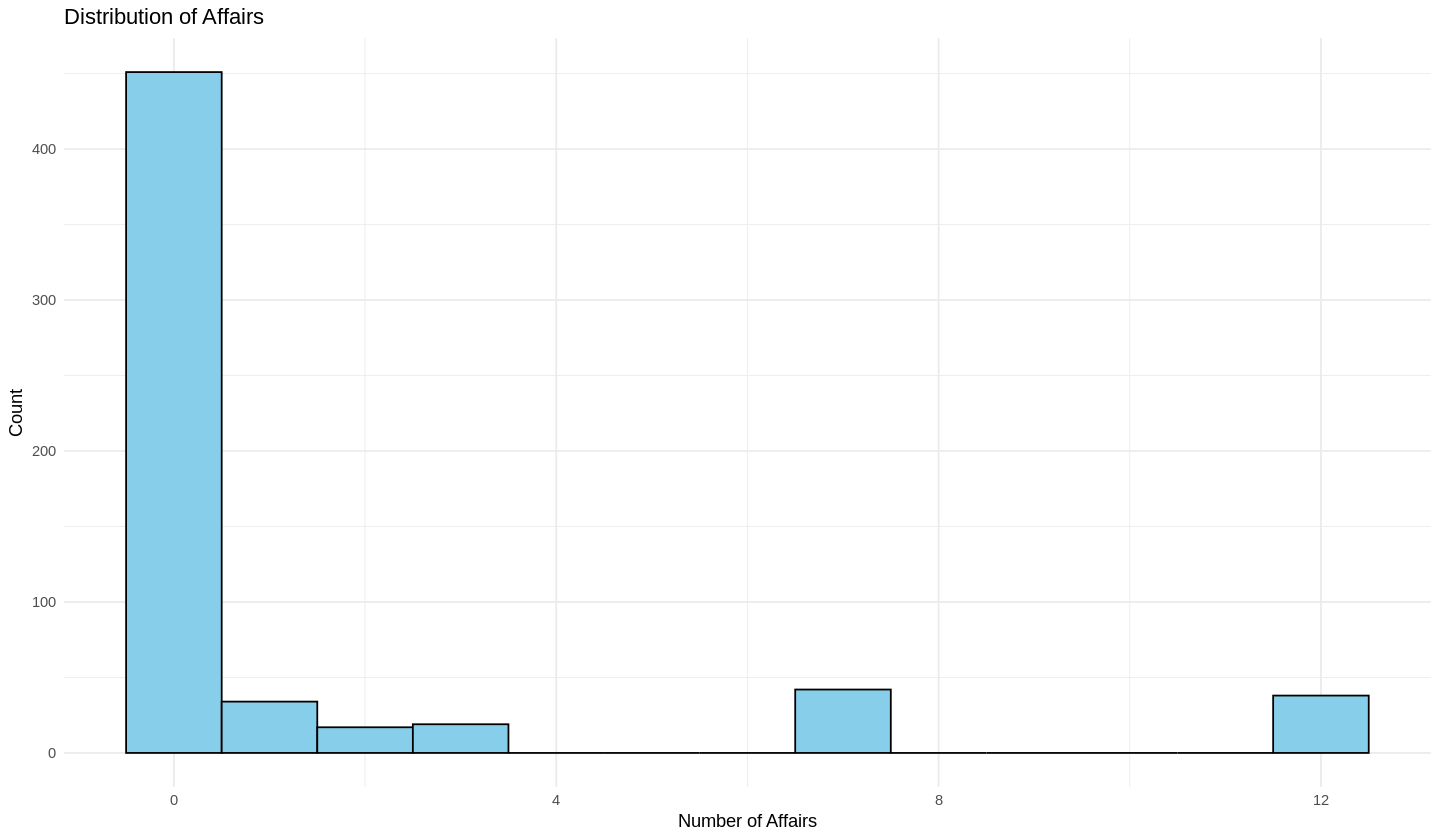

In [5]:
# Visualize the distribution of the censored variable 'affairs'
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(df, aes(x = affairs)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Affairs", x = "Number of Affairs", y = "Count") +
  theme_minimal()

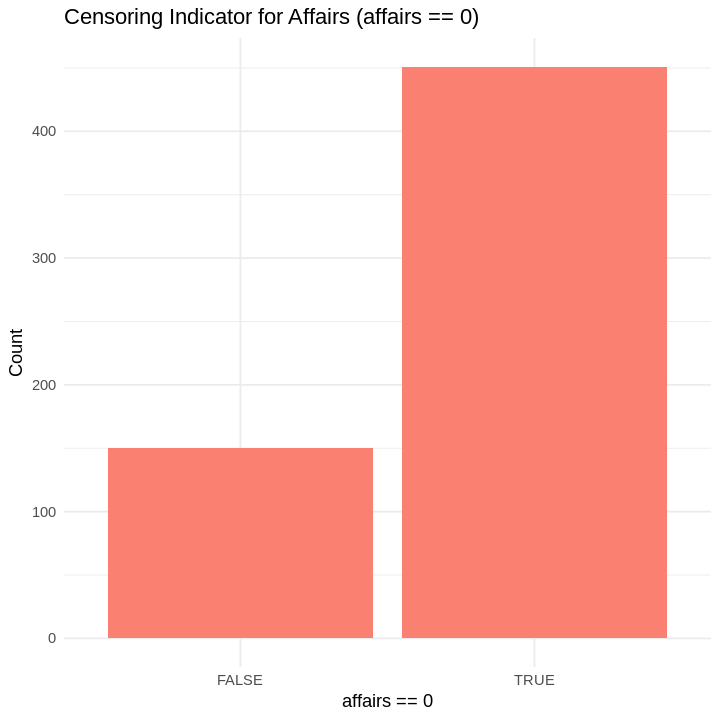

In [6]:
# Identify censoring (affairs == 0 indicates no affairs, hence censored at 0)
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(df, aes(x = factor(affairs == 0))) +
  geom_bar(fill = "salmon") +
  labs(
    title = "Censoring Indicator for Affairs (affairs == 0)",
    x = "affairs == 0",
    y = "Count"
  ) +
  theme_minimal()

In [7]:
# Correlation matrix for numeric variables
numeric_vars <- df %>% select_if(is.numeric)
cor_matrix <- cor(numeric_vars, use = "complete.obs")
cor_matrix

,affairs,age,yearsmarried,religiousness,education,occupation,rating
affairs,1.000000000,0.0952372,0.18684169,-0.14450135,-0.002437441,0.04961176,-0.27951240
age,0.095237204,1.0000000,0.77754585,0.19377693,0.134596015,0.16641254,-0.19899990
yearsmarried,0.186841686,0.7775458,1.00000000,0.21826067,0.040002716,0.04459201,-0.24311883
religiousness,-0.144501345,0.1937769,0.21826067,1.00000000,-0.042571079,-0.03972232,0.02429578
education,-0.002437441,0.1345960,0.04000272,-0.04257108,1.000000000,0.53360524,0.10930347
occupation,0.049611758,0.1664125,0.04459201,-0.03972232,0.533605242,1.00000000,0.01742227
rating,-0.279512403,-0.1989999,-0.24311883,0.02429578,0.109303473,0.01742227,1.00000000


 # Prepare Data

In [8]:
# Set seed
set.seed(123)

# Split the data into training (80%) and testing (20%) sets
train_index <- createDataPartition(df$affairs, p = 0.8, list = FALSE)
train_data <- df[train_index, ]
test_data  <- df[-train_index, ]

In [9]:
# Identify categorical variables
categorical_vars <- c("gender", "religiousness", "education", "occupation", "rating")

# Convert to factors in training and test sets
train_data[categorical_vars] <- lapply(train_data[categorical_vars], factor)
test_data[categorical_vars] <- lapply(test_data[categorical_vars], factor)

In [10]:
# Ensure levels in test set match training set
for(var in categorical_vars){
  test_data[[var]] <- factor(test_data[[var]], levels = levels(train_data[[var]]))
}

In [11]:
# Scale numeric predictors
numeric_predictors <- c("age")

preProcValues <- preProcess(train_data[, numeric_predictors, drop = FALSE], method = c("center", "scale"))

train_data_scaled <- train_data
train_data_scaled[, numeric_predictors] <- predict(preProcValues, train_data[, numeric_predictors, drop = FALSE])

test_data_scaled <- test_data
test_data_scaled[, numeric_predictors]  <- predict(preProcValues, test_data[, numeric_predictors, drop = FALSE])

In [12]:
# Verify the data types
str(train_data_scaled)

'data.frame':	481 obs. of  9 variables:
 $ affairs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ gender       : Factor w/ 2 levels "female","male": 2 2 1 1 2 2 2 2 2 1 ...
 $ age          : num  2.6599 -1.1134 -0.0353 -1.1134 2.6599 ...
 $ yearsmarried : num  15 0.75 1.5 0.75 15 1.5 15 4 15 1.5 ...
 $ children     : Factor w/ 2 levels "no","yes": 2 1 1 1 2 1 2 2 2 1 ...
 $ religiousness: Factor w/ 5 levels "1","2","3","4",..: 5 2 2 2 2 4 2 4 5 2 ...
 $ education    : Factor w/ 7 levels "9","12","14",..: 6 5 5 2 3 3 7 6 5 5 ...
 $ occupation   : Factor w/ 7 levels "1","2","3","4",..: 6 6 5 1 4 4 7 6 6 5 ...
 $ rating       : Factor w/ 5 levels "1","2","3","4",..: 5 3 5 3 4 5 2 4 4 4 ...


# Explanatory Modeling

In [13]:
# Create full dataset
full_data <- df
full_data[categorical_vars] <- lapply(full_data[categorical_vars], factor)
str(full_data)

'data.frame':	601 obs. of  9 variables:
 $ affairs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ gender       : Factor w/ 2 levels "female","male": 2 1 1 2 2 1 1 2 1 2 ...
 $ age          : num  37 27 32 57 22 32 22 57 32 22 ...
 $ yearsmarried : num  10 4 15 15 0.75 1.5 0.75 15 15 1.5 ...
 $ children     : Factor w/ 2 levels "no","yes": 1 1 2 2 1 1 1 2 2 1 ...
 $ religiousness: Factor w/ 5 levels "1","2","3","4",..: 3 4 1 5 2 2 2 2 4 4 ...
 $ education    : Factor w/ 7 levels "9","12","14",..: 6 3 2 6 5 5 2 3 4 3 ...
 $ occupation   : Factor w/ 7 levels "1","2","3","4",..: 7 6 1 6 6 5 1 4 1 4 ...
 $ rating       : Factor w/ 5 levels "1","2","3","4",..: 4 4 4 5 3 5 3 4 2 5 ...


In [14]:
# censReg Model
censReg_model_full <- censReg(affairs ~ ., data = full_data, left = 0)
summary(censReg_model_full)


Call:
censReg(formula = affairs ~ ., left = 0, data = full_data)

Observations:
         Total  Left-censored     Uncensored Right-censored 
           601            451            150              0 

Coefficients:
               Estimate Std. error t value  Pr(> t)    
(Intercept)     4.32873    4.98178   0.869 0.384895    
gendermale      0.69914    1.11367   0.628 0.530147    
age            -0.20020    0.08038  -2.491 0.012750 *  
yearsmarried    0.53581    0.14586   3.674 0.000239 ***
childrenyes     1.16177    1.28783   0.902 0.366996    
religiousness2 -4.12328    1.63787  -2.517 0.011820 *  
religiousness3 -3.01681    1.65461  -1.823 0.068262 .  
religiousness4 -7.07309    1.67926  -4.212 2.53e-05 ***
religiousness5 -6.89248    2.02206  -3.409 0.000653 ***
education12    -0.50950    4.40692  -0.116 0.907959    
education14    -2.57267    4.26891  -0.603 0.546740    
education16    -2.83286    4.36144  -0.650 0.515999    
education17     0.66074    4.34373   0.152 0.879097   

In [15]:
# cenGAM Model
cenGAM_model_full <- gam(
  affairs ~ s(age, k = 3) + gender + yearsmarried + religiousness + education + occupation + rating,
  family = tobit1(left.threshold = 0),
  data = full_data
)
summary(cenGAM_model_full)


Family: Censored normal (sigma=9.012) 
Link function: identity 

Formula:
affairs ~ s(age, k = 3) + gender + yearsmarried + religiousness + 
    education + occupation + rating

Parametric coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.7327     5.2579  -0.520  0.60325    
gendermale       0.8694     1.2592   0.690  0.48991    
yearsmarried     0.6330     0.1529   4.139 3.49e-05 ***
religiousness2  -4.5172     1.8445  -2.449  0.01433 *  
religiousness3  -3.2379     1.8719  -1.730  0.08368 .  
religiousness4  -7.7031     1.8715  -4.116 3.86e-05 ***
religiousness5  -7.4301     2.2666  -3.278  0.00104 ** 
education12     -0.1606     5.0225  -0.032  0.97448    
education14     -2.3726     4.8702  -0.487  0.62614    
education16     -2.6312     4.9755  -0.529  0.59692    
education17      1.1027     4.9516   0.223  0.82377    
education18     -0.8691     4.9811  -0.174  0.86150    
education20     -0.7518     5.1424  -0.146  0.88377    
occupation2 

In [16]:
# Tobit Model from AER
tobit_model_full <- tobit(affairs ~ ., data = full_data, left = 0)
summary(tobit_model_full)


Call:
tobit(formula = affairs ~ ., left = 0, data = full_data)

Observations:
         Total  Left-censored     Uncensored Right-censored 
           601            451            150              0 

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.32873    4.98178   0.869 0.384895    
gendermale      0.69914    1.11367   0.628 0.530147    
age            -0.20020    0.08038  -2.491 0.012750 *  
yearsmarried    0.53581    0.14586   3.674 0.000239 ***
childrenyes     1.16177    1.28783   0.902 0.366996    
religiousness2 -4.12328    1.63787  -2.517 0.011820 *  
religiousness3 -3.01681    1.65461  -1.823 0.068262 .  
religiousness4 -7.07309    1.67926  -4.212 2.53e-05 ***
religiousness5 -6.89248    2.02206  -3.409 0.000653 ***
education12    -0.50950    4.40692  -0.116 0.907959    
education14    -2.57267    4.26891  -0.603 0.546740    
education16    -2.83286    4.36144  -0.650 0.515999    
education17     0.66074    4.34373   0.152 0.879097    


# Predictive Modeling

In [17]:
# censReg Model
censReg_model_train <- censReg(affairs ~ ., data = train_data_scaled, left = 0)
summary(censReg_model_train)


Call:
censReg(formula = affairs ~ ., left = 0, data = train_data_scaled)

Observations:
         Total  Left-censored     Uncensored Right-censored 
           481            363            118              0 

Coefficients:
               Estimate Std. error t value  Pr(> t)    
(Intercept)    -2.04409    6.06422  -0.337 0.736061    
gendermale      0.59008    1.27876   0.461 0.644478    
age            -1.30830    0.84751  -1.544 0.122661    
yearsmarried    0.48443    0.16554   2.926 0.003430 ** 
childrenyes     0.74504    1.45671   0.511 0.609036    
religiousness2 -4.27594    1.94126  -2.203 0.027619 *  
religiousness3 -2.69650    1.95706  -1.378 0.168256    
religiousness4 -7.51155    1.95549  -3.841 0.000122 ***
religiousness5 -6.56799    2.31913  -2.832 0.004624 ** 
education12     3.29830    5.71994   0.577 0.564188    
education14     0.97593    5.59524   0.174 0.861534    
education16     1.54390    5.70919   0.270 0.786835    
education17     3.92753    5.68423   0.691 0.4

In [18]:
# cenGAM Model
cenGAM_model_train <- gam(
  affairs ~ s(age, k = 3) + gender + yearsmarried + religiousness + education + occupation + rating,
  family = tobit1(left.threshold = 0),
  data = train_data_scaled
)
summary(cenGAM_model_train)


Family: Censored normal (sigma=9.438) 
Link function: identity 

Formula:
affairs ~ s(age, k = 3) + gender + yearsmarried + religiousness + 
    education + occupation + rating

Parametric coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.1933     7.1323  -0.448 0.654352    
gendermale       0.7486     1.5099   0.496 0.620061    
yearsmarried     0.5761     0.1819   3.167 0.001539 ** 
religiousness2  -4.8596     2.2776  -2.134 0.032874 *  
religiousness3  -2.9799     2.3116  -1.289 0.197364    
religiousness4  -8.4132     2.2728  -3.702 0.000214 ***
religiousness5  -7.3775     2.7152  -2.717 0.006586 ** 
education12      4.1961     6.7844   0.618 0.536248    
education14      1.7106     6.6422   0.258 0.796766    
education16      2.3776     6.7757   0.351 0.725662    
education17      4.9365     6.7417   0.732 0.464024    
education18      2.8564     6.7799   0.421 0.673531    
education20      3.0557     6.9601   0.439 0.660645    
occupation2 

In [19]:
# Tobit Model from AER
tobit_model_train <- tobit(affairs ~ ., data = train_data_scaled, left = 0)
summary(tobit_model_train)


Call:
tobit(formula = affairs ~ ., left = 0, data = train_data_scaled)

Observations:
         Total  Left-censored     Uncensored Right-censored 
           481            363            118              0 

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.04409    6.06422  -0.337 0.736061    
gendermale      0.59008    1.27876   0.461 0.644478    
age            -1.30830    0.84751  -1.544 0.122661    
yearsmarried    0.48443    0.16554   2.926 0.003430 ** 
childrenyes     0.74504    1.45671   0.511 0.609036    
religiousness2 -4.27594    1.94126  -2.203 0.027619 *  
religiousness3 -2.69650    1.95706  -1.378 0.168256    
religiousness4 -7.51155    1.95549  -3.841 0.000122 ***
religiousness5 -6.56799    2.31913  -2.832 0.004624 ** 
education12     3.29830    5.71994   0.577 0.564188    
education14     0.97593    5.59524   0.174 0.861534    
education16     1.54390    5.70919   0.270 0.786835    
education17     3.92753    5.68423   0.691 0.489

# Model Evaluation

In [20]:
# Explanatory Modeling Evaluation (Full Dataset)
explanatory_metrics <- data.frame(
  Model = c("censReg", "cenGAM", "Tobit"),
  AIC = c(AIC(censReg_model_full), AIC(cenGAM_model_full), AIC(tobit_model_full)),
  BIC = c(BIC(censReg_model_full), BIC(cenGAM_model_full), BIC(tobit_model_full))
)

print("Explanatory Modeling Metrics (Full Dataset):")
explanatory_metrics

[1] "Explanatory Modeling Metrics (Full Dataset):"


Model,AIC,BIC
<chr>,<dbl>,<dbl>
censReg,1440.584,1554.947
cenGAM,1442.591,1552.556
Tobit,1440.584,1554.947


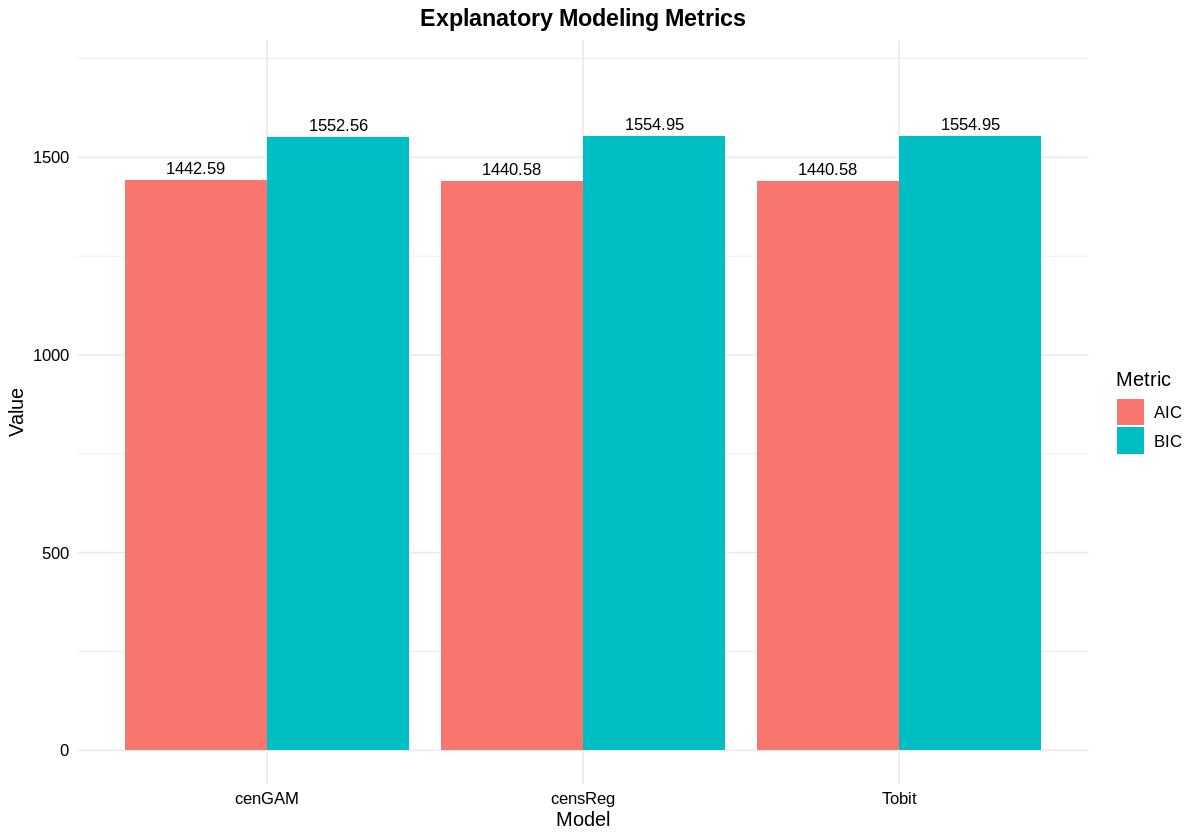

In [21]:
# Explanatory Modeling: Compare AIC & BIC
options(repr.plot.width = 10, repr.plot.height = 7)
explanatory_long <- explanatory_metrics %>%
  pivot_longer(cols = c(AIC, BIC), names_to = "Metric", values_to = "Value")

ggplot(explanatory_long, aes(x = Model, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = round(Value, 2)),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3.5) +
  labs(title = "Explanatory Modeling Metrics", y = "Value") +
  theme_minimal() +
  theme(
    plot.title = element_text(
      hjust = 0.5,
      size = 14,
      face = "bold",
      color = "black"
    ),
    axis.title.x = element_text(
      size = 12,
      color = "black"
    ),
    axis.title.y = element_text(
      size = 12,
      color = "black"
    ),
    axis.text.x = element_text(
      size = 10,
      color = "black"
    ),
    axis.text.y = element_text(
      size = 10,
      color = "black"
    ),
    legend.title = element_text(
      size = 12,
      color = "black"
    ),
    legend.text = element_text(
      size = 10,
      color = "black"
    )
  ) +
  ylim(0, max(explanatory_long$Value) * 1.1)

No predict() method for the censReg model.

In [22]:
# cenGAM Predictions
cenGAM_pred <- predict(cenGAM_model_train, newdata = test_data_scaled)

In [23]:
# Tobit Predictions
tobit_pred <- predict(tobit_model_train, newdata = test_data_scaled)

In [24]:
# Predictive Modeling Evaluation
predictive_metrics <- data.frame(
  Model = c("cenGAM", "Tobit"),
  RMSE = c(
    rmse(test_data_scaled$affairs, cenGAM_pred),
    rmse(test_data_scaled$affairs, tobit_pred)
  ),
  MAE = c(
    mae(test_data_scaled$affairs, cenGAM_pred),
    mae(test_data_scaled$affairs, tobit_pred)
  )
)

print("Predictive Modeling Metrics:")
predictive_metrics

[1] "Predictive Modeling Metrics:"


Model,RMSE,MAE
<chr>,<dbl>,<dbl>
cenGAM,9.507447,8.375812
Tobit,8.173967,7.097605


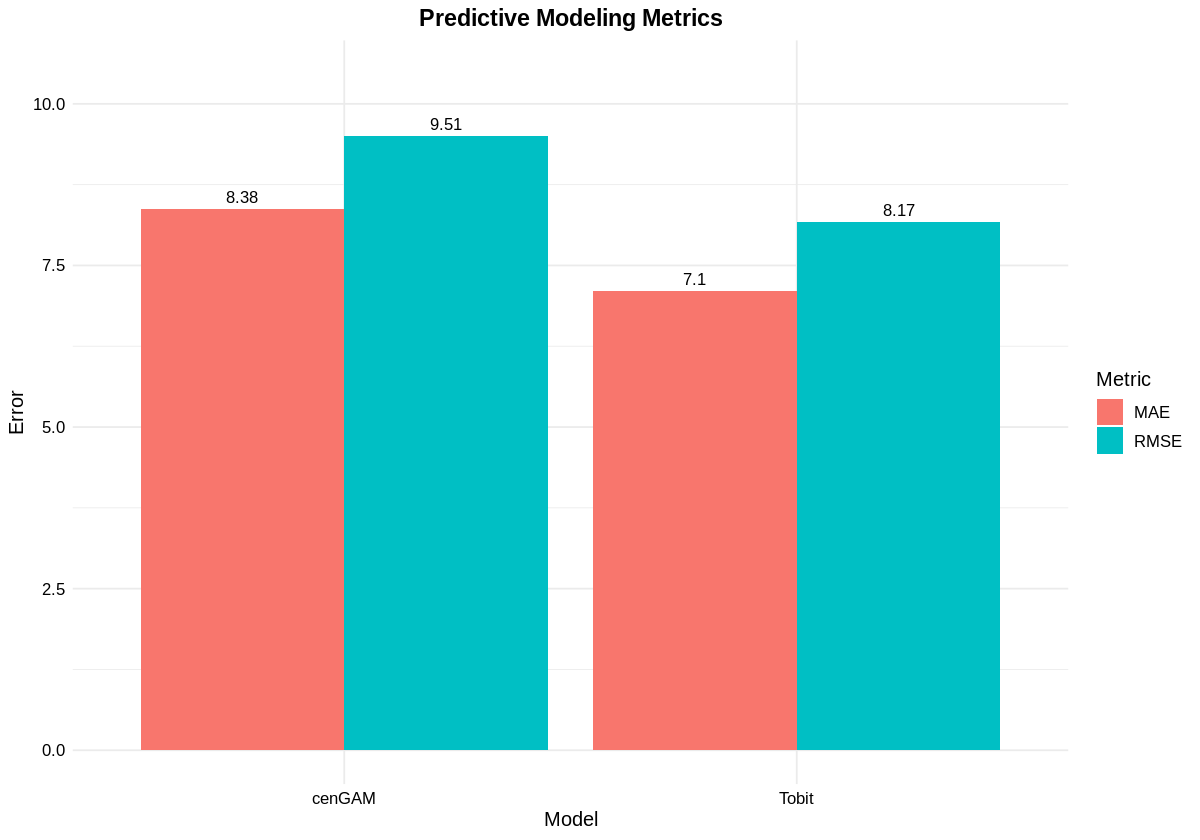

In [25]:
# Predictive Modeling: Compare RMSE and MAE
options(repr.plot.width = 10, repr.plot.height = 7)
predictive_long <- predictive_metrics %>%
  pivot_longer(cols = c(RMSE, MAE), names_to = "Metric", values_to = "Value")

ggplot(predictive_long, aes(x = Model, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = round(Value, 2)),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3.5) +
  labs(title = "Predictive Modeling Metrics", y = "Error") +
  theme_minimal() +
  theme(
    plot.title = element_text(
      hjust = 0.5,
      size = 14,
      face = "bold",
      color = "black"
    ),
    axis.title.x = element_text(
      size = 12,
      color = "black"
    ),
    axis.title.y = element_text(
      size = 12,
      color = "black"
    ),
    axis.text.x = element_text(
      size = 10,
      color = "black"
    ),
    axis.text.y = element_text(
      size = 10,
      color = "black"
    ),
    legend.title = element_text(
      size = 12,
      color = "black"
    ),
    legend.text = element_text(
      size = 10,
      color = "black"
    )
  ) +
  ylim(0, max(predictive_long$Value) * 1.1)

In [26]:
# Combine all metrics into one dataframe for comparison
all_metrics <- explanatory_metrics %>%
  left_join(predictive_metrics, by = "Model")

print("Combined Model Metrics:")
all_metrics

[1] "Combined Model Metrics:"


Model,AIC,BIC,RMSE,MAE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
censReg,1440.584,1554.947,NA,NA
cenGAM,1442.591,1552.556,9.507447,8.375812
Tobit,1440.584,1554.947,8.173967,7.097605


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_text()`).”


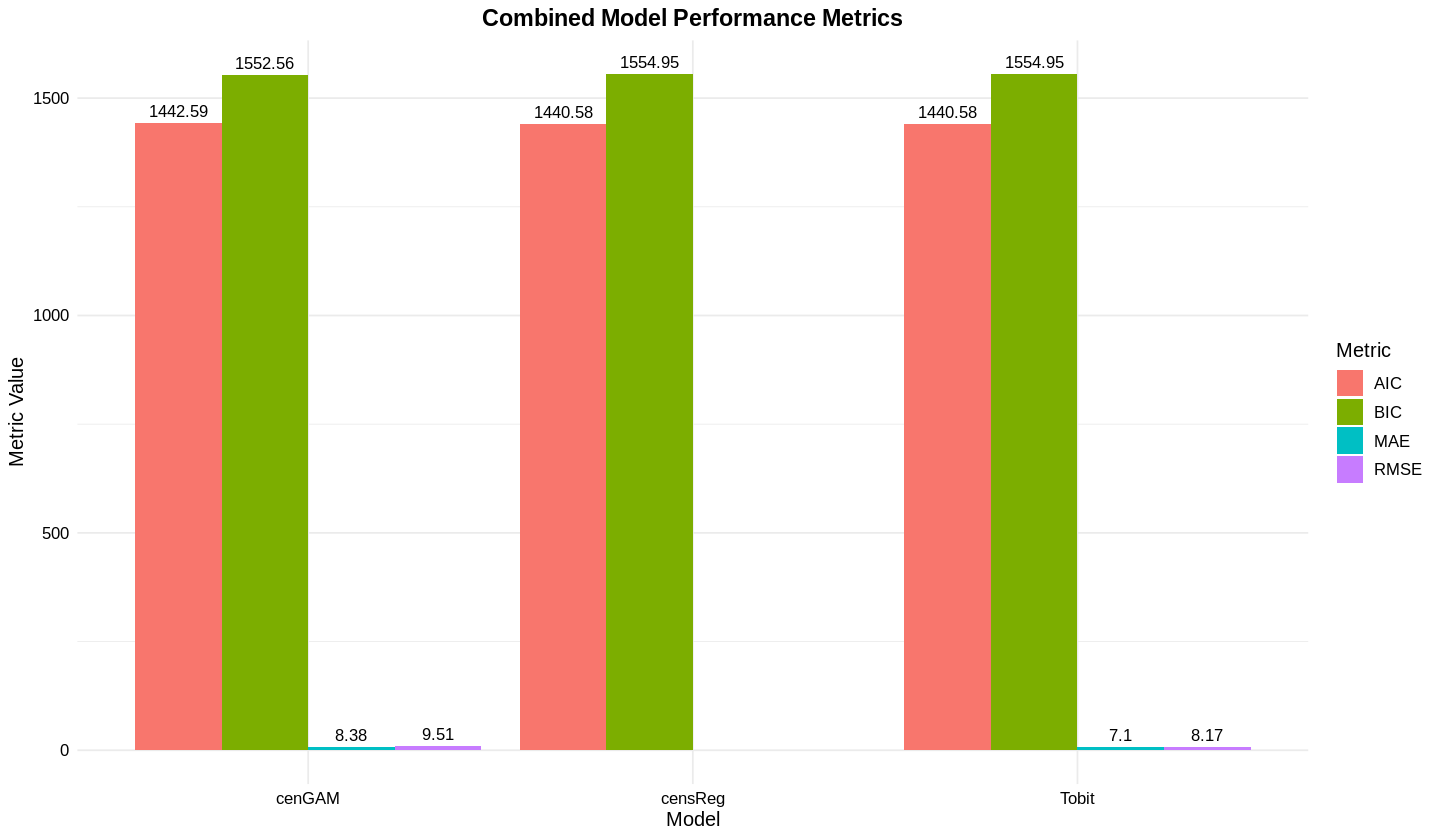

In [28]:
# Visualize Combined Metrics
# Melt the dataframe
options(repr.plot.width = 12, repr.plot.height = 7)
all_metrics_long <- all_metrics %>%
  pivot_longer(cols = -Model, names_to = "Metric", values_to = "Value")

ggplot(all_metrics_long, aes(x = Model, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = round(Value, 2)),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3.5) +
  labs(title = "Combined Model Performance Metrics", y = "Metric Value") +
  theme_minimal() +
  theme(
    plot.title = element_text(
      hjust = 0.5,
      size = 14,
      face = "bold",
      color = "black"
    ),
    axis.title.x = element_text(
      size = 12,
      color = "black"
    ),
    axis.title.y = element_text(
      size = 12,
      color = "black"
    ),
    axis.text.x = element_text(
      size = 10,
      color = "black"
    ),
    axis.text.y = element_text(
      size = 10,
      color = "black"
    ),
    legend.title = element_text(
      size = 12,
      color = "black"
    ),
    legend.text = element_text(
      size = 10,
      color = "black"
    )
  ) +
  ylim(0, max(all_metrics_long$Value) * 1.1)